In [1]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/config/workspace/Dataset/nba_rookie_data.csv')
df.head()


,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [3]:
df.shape

(1340, 21)

In [4]:
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
def column_cleaner(data):
    stack1=[]
    final_stack=[]
    for col in df.columns:
        stack1.append(col.replace(' ',''))

    for col2 in stack1:
        final_stack.append(col2.replace('3',''))
    return final_stack

In [6]:
new_col=column_cleaner(df.columns)

In [7]:

df.columns=new_col

In [8]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalAttempts     0
FieldGoalPercent      0
PointMade             0
PointAttempt          0
PointPercent         11
FreeThrowMade         0
FreeThrowAttempts     0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
TARGET_5Yrs           0
dtype: int64

In [9]:
df.dtypes

Name                  object
GamesPlayed            int64
MinutesPlayed        float64
PointsPerGame        float64
FieldGoalsMade       float64
FieldGoalAttempts    float64
FieldGoalPercent     float64
PointMade            float64
PointAttempt         float64
PointPercent         float64
FreeThrowMade        float64
FreeThrowAttempts    float64
FreeThrowPercent     float64
OffensiveRebounds    float64
DefensiveRebounds    float64
Rebounds             float64
Assists              float64
Steals               float64
Blocks               float64
Turnovers            float64
TARGET_5Yrs            int64
dtype: object

In [10]:
df.isnull().sum()

Name                  0
GamesPlayed           0
MinutesPlayed         0
PointsPerGame         0
FieldGoalsMade        0
FieldGoalAttempts     0
FieldGoalPercent      0
PointMade             0
PointAttempt          0
PointPercent         11
FreeThrowMade         0
FreeThrowAttempts     0
FreeThrowPercent      0
OffensiveRebounds     0
DefensiveRebounds     0
Rebounds              0
Assists               0
Steals                0
Blocks                0
Turnovers             0
TARGET_5Yrs           0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1329, 21)

In [13]:
df['TARGET_5Yrs'].value_counts()

TARGET_5Yrs
1    826
0    503
Name: count, dtype: int64

<Axes: >

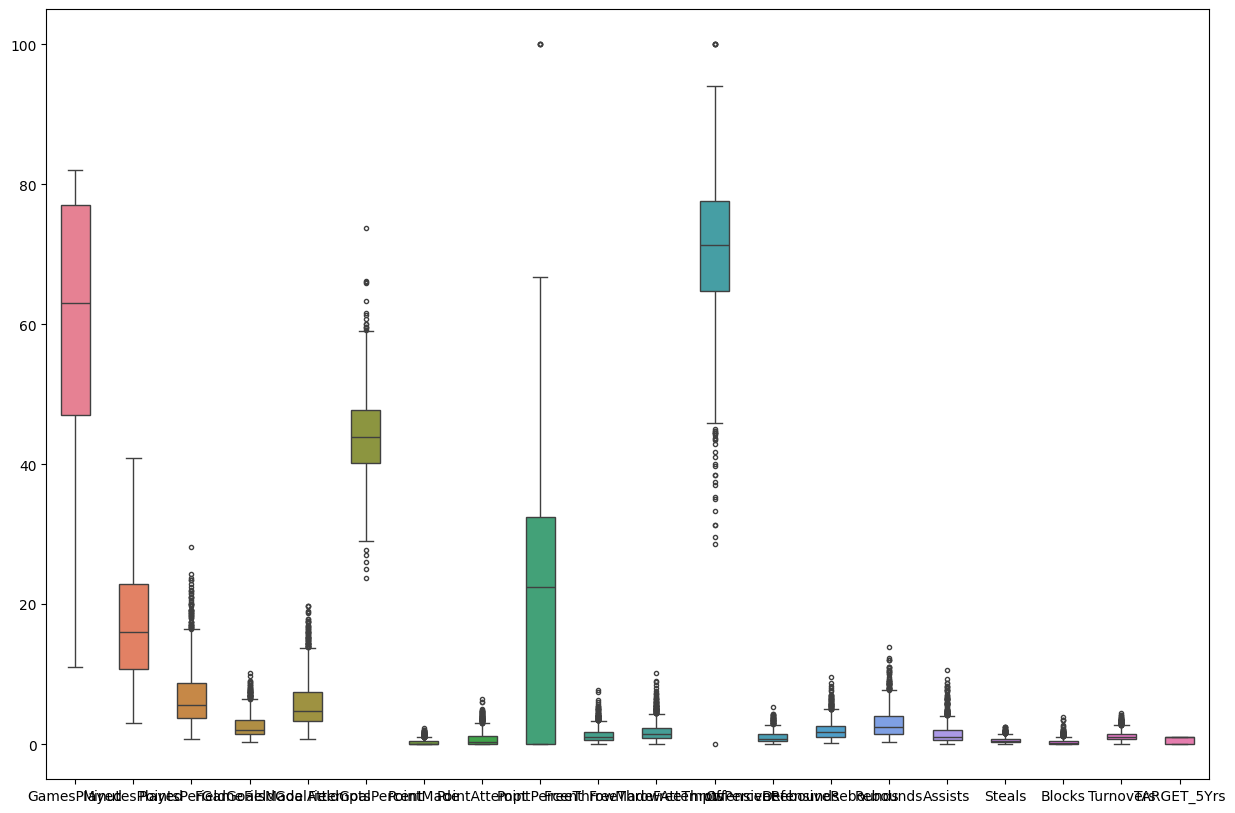

In [14]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [15]:
df.dtypes

Name                  object
GamesPlayed            int64
MinutesPlayed        float64
PointsPerGame        float64
FieldGoalsMade       float64
FieldGoalAttempts    float64
FieldGoalPercent     float64
PointMade            float64
PointAttempt         float64
PointPercent         float64
FreeThrowMade        float64
FreeThrowAttempts    float64
FreeThrowPercent     float64
OffensiveRebounds    float64
DefensiveRebounds    float64
Rebounds             float64
Assists              float64
Steals               float64
Blocks               float64
Turnovers            float64
TARGET_5Yrs            int64
dtype: object

In [16]:
X=df.drop(columns=['TARGET_5Yrs','Name'])
y=df['TARGET_5Yrs']

In [17]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((996, 19), (333, 19))

In [18]:
X_train.head(2)

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalAttempts,FieldGoalPercent,PointMade,PointAttempt,PointPercent,FreeThrowMade,FreeThrowAttempts,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
1141,58,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7
1052,38,10.1,4.0,1.4,3.4,39.7,0.5,1.3,38.0,0.8,1.1,72.5,0.1,1.1,1.2,0.7,0.2,0.0,0.5


In [19]:
X_train.columns

Index(['GamesPlayed', 'MinutesPlayed', 'PointsPerGame', 'FieldGoalsMade',
       'FieldGoalAttempts', 'FieldGoalPercent', 'PointMade', 'PointAttempt',
       'PointPercent', 'FreeThrowMade', 'FreeThrowAttempts',
       'FreeThrowPercent', 'OffensiveRebounds', 'DefensiveRebounds',
       'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers'],
      dtype='object')

In [20]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('/config/workspace/Model/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [21]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [22]:
# pip install catboost

In [23]:
from catboost import CatBoostClassifier

In [24]:
cat_boost=CatBoostClassifier()
cat_boost.fit(X_train_scaled,y_train)

Learning rate set to 0.010285
0:	learn: 0.6901907	total: 55.8ms	remaining: 55.8s
1:	learn: 0.6875431	total: 61.2ms	remaining: 30.5s
2:	learn: 0.6851093	total: 67ms	remaining: 22.3s
3:	learn: 0.6822928	total: 70.2ms	remaining: 17.5s
4:	learn: 0.6799079	total: 73.3ms	remaining: 14.6s
5:	learn: 0.6775596	total: 75.8ms	remaining: 12.6s
6:	learn: 0.6750816	total: 78.6ms	remaining: 11.2s
7:	learn: 0.6727408	total: 81.3ms	remaining: 10.1s
8:	learn: 0.6702783	total: 84.2ms	remaining: 9.27s
9:	learn: 0.6678582	total: 86.5ms	remaining: 8.57s
10:	learn: 0.6655408	total: 88.8ms	remaining: 7.99s
11:	learn: 0.6632959	total: 91.8ms	remaining: 7.56s
12:	learn: 0.6613480	total: 94.2ms	remaining: 7.15s
13:	learn: 0.6589699	total: 96.5ms	remaining: 6.8s
14:	learn: 0.6569028	total: 99ms	remaining: 6.5s
15:	learn: 0.6546599	total: 101ms	remaining: 6.24s
16:	learn: 0.6527514	total: 104ms	remaining: 6.01s
17:	learn: 0.6511719	total: 106ms	remaining: 5.79s
18:	learn: 0.6490259	total: 108ms	remaining: 5.6s
19:

In [25]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {'depth'         : [4,7,9],
                 'learning_rate' : [0.01,0.02,0.04],
                  'iterations'    : [30,50,100],
}


In [26]:
cat_boost=CatBoostClassifier()
clf = GridSearchCV(cat_boost,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

clf.fit(X_train_scaled,y_train)

0:	learn: 0.6911794	total: 2.89ms	remaining: 83.8ms
1:	learn: 0.6892744	total: 4.41ms	remaining: 61.7ms
2:	learn: 0.6875943	total: 5.52ms	remaining: 49.7ms
3:	learn: 0.6857331	total: 6.51ms	remaining: 42.3ms
4:	learn: 0.6841111	total: 7.63ms	remaining: 38.1ms
5:	learn: 0.6825222	total: 8.55ms	remaining: 34.2ms
6:	learn: 0.6812757	total: 9.6ms	remaining: 31.6ms
7:	learn: 0.6795370	total: 10.5ms	remaining: 29ms
8:	learn: 0.6779950	total: 11.5ms	remaining: 26.8ms
9:	learn: 0.6763817	total: 12.6ms	remaining: 25.1ms
10:	learn: 0.6747799	total: 13.6ms	remaining: 23.5ms
11:	learn: 0.6732955	total: 14.6ms	remaining: 21.9ms
12:	learn: 0.6717759	total: 15.6ms	remaining: 20.4ms
13:	learn: 0.6700983	total: 16.5ms	remaining: 18.9ms
14:	learn: 0.6687250	total: 17.6ms	remaining: 17.6ms
15:	learn: 0.6675085	total: 18.5ms	remaining: 16.1ms
16:	learn: 0.6659866	total: 19.4ms	remaining: 14.9ms
17:	learn: 0.6647253	total: 20.4ms	remaining: 13.6ms
18:	learn: 0.6632475	total: 21.3ms	remaining: 12.3ms
19:	le

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fc6a60862b0>,
             param_grid={'depth': [4, 7, 9], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.02, 0.04]},
             scoring='accuracy')

In [27]:
clf.best_params_

{'depth': 7, 'iterations': 100, 'learning_rate': 0.01}

In [28]:
clf.best_score_

0.6998282828282828

In [29]:
y_pred = clf.predict(X_test_scaled)

In [30]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 71,  57],
       [ 33, 172]])

In [31]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [32]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7297297297297297

In [33]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.5546875

In [34]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6826923076923077

In [35]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.6120689655172413

In [36]:
import pickle
file = open('/config/workspace/Model/modelForPrediction.pkl','wb')
pickle.dump(cat_boost,file)
file.close()

In [37]:
file = open('/config/workspace/Model/model2.pkl','wb')
pickle.dump(clf,file)
file.close()